In [23]:
import numpy as np
import SimpleITK as sitk
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [24]:
geometric_properties = pd.read_excel(r"D:\Volumes_Thicknesses_cartilage2.xlsx")


In [25]:
geometric_properties

,Cartilage ID,cartilage mean thickness MR [mm],cartilage mean thickness pcct [mm],cartilage std thickness MR [mm],cartilage std thickness pcct [mm],cartilage volume MR [mm^3],cartilage volume pcct [mm^3]
0,07_2017_femoral_cartilage,3.023222,3.145200,0.848746,0.931080,6335.047195,9121.870545
1,17_2016_femoral_cartilage,3.440990,3.104185,0.996718,1.005908,8018.924830,7546.834262
2,18_2018_femoral_cartilage,3.685220,2.887672,0.902018,0.901382,7472.300734,7318.641425
3,30_2017_femoral_cartilage,3.114564,2.941565,0.886422,0.913863,5714.027007,7458.025499
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,07_2017_retro_patellar_cartilage,3.823373,3.502910,0.772183,1.056949,3110.334522,2464.614683
6,17_2016_retro_patellar_cartilage,3.789577,3.814466,0.773957,0.926012,2972.330230,2439.474682
7,18_2018_retro_patellar_cartilage,3.823237,3.283422,0.876968,0.975920,2178.272167,1702.414235
8,30_2017_retro_patellar_cartilage,3.338199,3.272804,0.902776,1.172010,1698.686084,2163.464366
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# set3 = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
# sns.color_palette("hls", 8)


C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\3082087.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


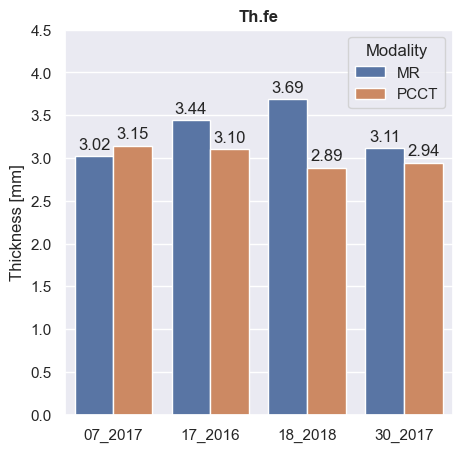

In [27]:
# sns.relplot(
#     data=geometric_properties[0:3],
#     x='cartilage mean thickness MR [mm]', y='cartilage mean thickness pcct [mm]')

# sns.barplot(data=geometric_properties[0:3],
#     x=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], y='Cartilage ID')


df_selected = geometric_properties.iloc[0:4]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

# plt.figure(figsize=(5, 6))
# sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)
# plt.title('Femoral cartilage', fontweight='bold')
# plt.xlabel('')  # Remove x-axis tick labels
# plt.show()


# Plotting with seaborn
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

# Customizing the plot
plt.title('Th.fe', fontweight='bold')
plt.xlabel('')  # Remove x-axis label
plt.ylim(0, 4.5)

plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\3673156970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


Text(0.5, 0, '')

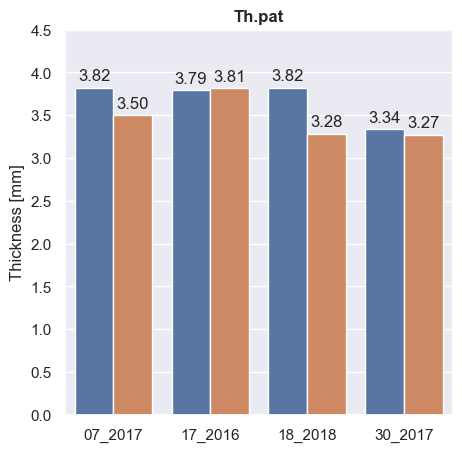

In [28]:
df_selected = geometric_properties.iloc[5:9]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

# Adding values on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')


# Customizing the plot
plt.title('Th.pat', fontweight='bold')
plt.legend().remove()
plt.ylim(0, 4.5)
plt.xlabel('')  # Remove x-axis label

C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\4213952770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


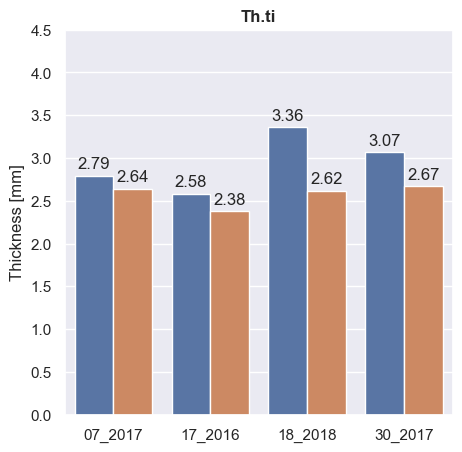

In [29]:
df_selected = geometric_properties.iloc[10:14]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')


plt.title('Th.ti', fontweight='bold')
plt.legend().remove()
plt.ylim(0, 4.5)
plt.xlabel('')  # Remove x-axis tick labels
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\4195554599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


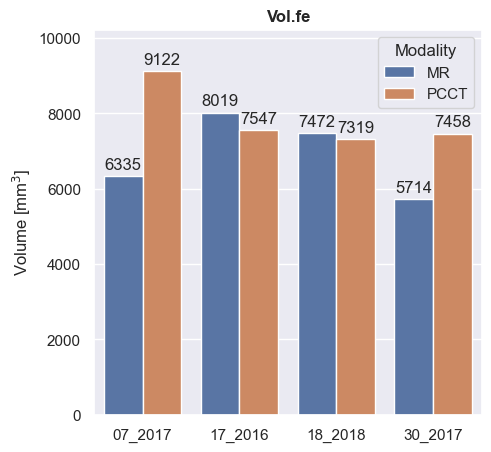

In [34]:
df_selected = geometric_properties.iloc[0:4]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.fe', fontweight='bold')
plt.xlabel('')  # Remove x-axis tick labels
plt.ylim(0, df_melted['Volume [mm$^3$]'].max() + 1100)
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\109983283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


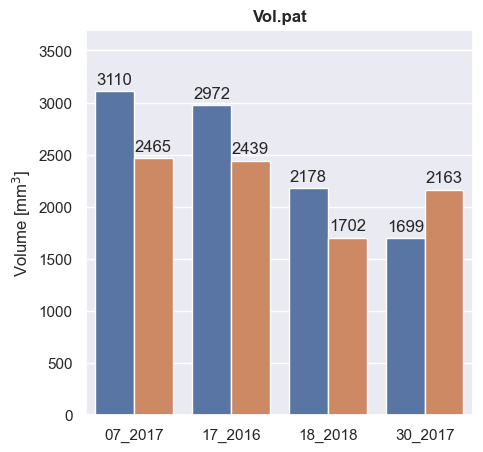

In [36]:
df_selected = geometric_properties.iloc[5:9]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.pat', fontweight='bold')
plt.legend().remove()
plt.xlabel('')  # Remove x-axis tick labels
plt.ylim(0, 3700)
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_72596\2800625489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


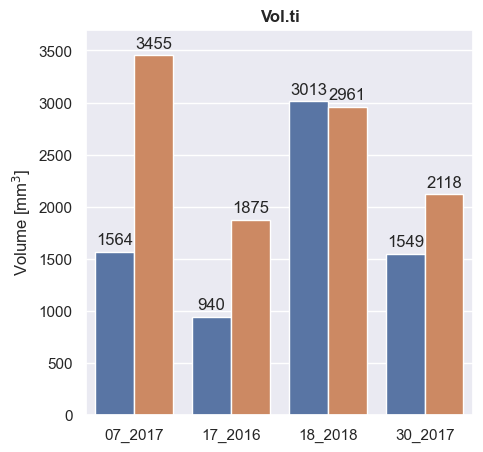

In [35]:
df_selected = geometric_properties.iloc[10:14]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.ti', fontweight='bold')
plt.legend().remove()
plt.xlabel('')  # Remove x-axis tick labels
plt.ylim(0, 3700)
plt.show()